# Text classification

In [70]:
import itertools 
import csv
import numpy as np
import pandas as pd

## Data Preprocessing

In [71]:
# Dummy example data.
vocabulary_size = 1000
sentences = ["A brown fox jumped on the lazy dog", 
            "A brown fox jumped on the brown duck",
            "A brown fox jumped on the lazy elephant",
            "An elephant is eating green grass near the alpaca",
            "A green alpaca tried to jump over an elephant",
            "May you rest in a deep and dreamless slumber"]
labels = ["fox", "fox", "fox", "alpaca", "alpaca", "not relate"]
df = pd.DataFrame({"text": sentences, "label": labels})
df

,text,label
0,A brown fox jumped on the lazy dog,fox
1,A brown fox jumped on the brown duck,fox
2,A brown fox jumped on the lazy elephant,fox
3,An elephant is eating green grass near the alpaca,alpaca
4,A green alpaca tried to jump over an elephant,alpaca
5,May you rest in a deep and dreamless slumber,not relate


## Text Vectorization

Common ways to vectorize your sentences are based on words count. 
Each sentence is represented by a vector of length N, where N is the size of your vocabulary. Each element of the vector is then associated with a word (or N-gram), and has a value that depends on the technique used for the vectorization.
* count
* tf-idf (term frequency * inverse term frequency)

In [72]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [73]:
# This class accepts functions for preprocessing and tokenization, 
# so you can operate your data cleaning directly at this point.
vectorizer = CountVectorizer(analyzer="word", max_features=vocabulary_size, stop_words="english", ngram_range=(1,2))
X = vectorizer.fit_transform(df["text"].values)

In [74]:
X.shape

(6, 37)

In [75]:
vectorizer.vocabulary_

{'brown': 2,
 'fox': 15,
 'jumped': 24,
 'lazy': 27,
 'dog': 7,
 'brown fox': 4,
 'fox jumped': 16,
 'jumped lazy': 26,
 'lazy dog': 28,
 'duck': 10,
 'jumped brown': 25,
 'brown duck': 3,
 'elephant': 13,
 'lazy elephant': 29,
 'eating': 11,
 'green': 19,
 'grass': 17,
 'near': 30,
 'alpaca': 0,
 'elephant eating': 14,
 'eating green': 12,
 'green grass': 21,
 'grass near': 18,
 'near alpaca': 31,
 'tried': 35,
 'jump': 22,
 'green alpaca': 20,
 'alpaca tried': 1,
 'tried jump': 36,
 'jump elephant': 23,
 'rest': 32,
 'deep': 5,
 'dreamless': 8,
 'slumber': 34,
 'rest deep': 33,
 'deep dreamless': 6,
 'dreamless slumber': 9}

In [76]:
X[4].toarray()

array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]])

In [77]:
y = df["label"]
y

0           fox
1           fox
2           fox
3        alpaca
4        alpaca
5    not relate
Name: label, dtype: object

## Classification

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [79]:

classifier = LogisticRegression()
classifier.fit(X, y)
classifier

LogisticRegression()

## Inference

In [80]:
new_text = ["This sentence describes a new fox",  "A random sentence about alpaca", "Deep learning"]
new_X = vectorizer.transform(new_text)
new_y = ["fox", "alpaca", "not relate"]

In [81]:
outputs = classifier.predict(new_X)
outputs

array(['fox', 'alpaca', 'fox'], dtype=object)

## Evaluation

Confusion matrix


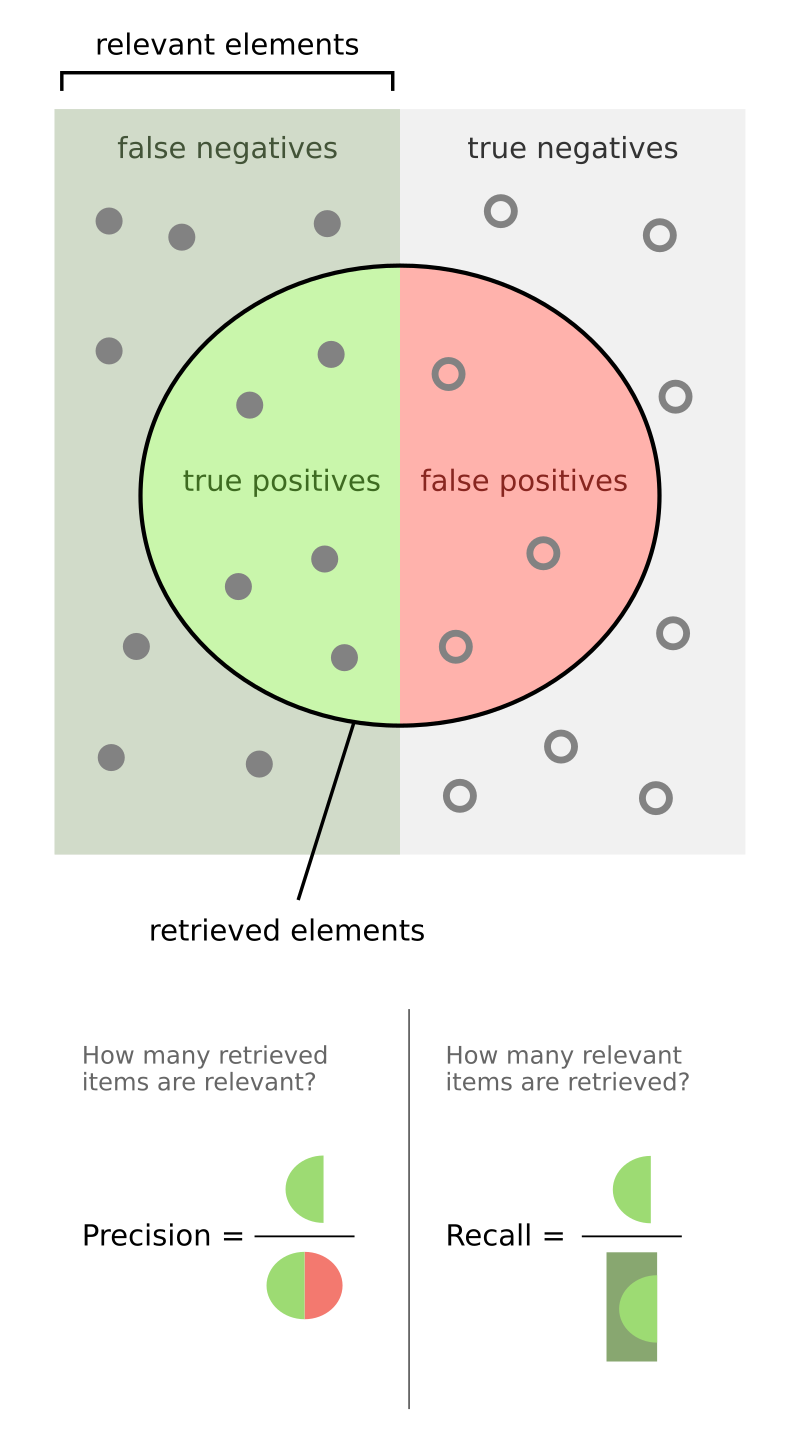

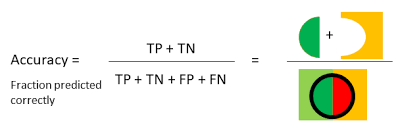

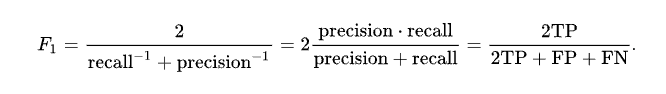

In [82]:
from sklearn.metrics import classification_report
report = classification_report(y_true=new_y, y_pred=outputs)
print(report)

              precision    recall  f1-score   support

      alpaca       1.00      1.00      1.00         1
         fox       0.50      1.00      0.67         1
  not relate       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3



/Users/levi/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/levi/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/levi/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Practice

Practice text classification using corrona dataset.

In [83]:
train_file = "Corona_NLP_train.csv"
train_df = pd.read_csv(train_file, encoding='latin-1')
train_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [84]:
test_file = "Corona_NLP_test.csv"
test_df = pd.read_csv(test_file, encoding='latin-1')
test_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


#### Train a classification model to predict the sentiment of a tweet. How good is your trained model?